**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

**1 A função densidade de probabilidade do comprimento de uma barra de metal é dada por $f(x) = 2$ para $2.3 < x < 2.8$ m.**

- 1.1 Se as especificações para produzir esta barra forem comprimento de $2.25$ a $2.75$ m, qual a proporção de barras que não atenderá as especificações?

Para atendar as especificações, as barras precisam estar no intervalo $2.25 < x < 2.75$. A proporção de barras que não atende a especificação pode ser entendida como a soma de A1 e A2 em que  A1 é área onde $2.25 < x < 2.3$ e A2 é a área onde $2.75 < x < 2.8$.

Sabe-se que, entre $2.3 < x < 2.8$, a função de densidade de probabilidade da barra possui o mesmo valor ($2$), mas não há informação para valores entre $2.25$ e $2.3$, logo, assume-se que $f(x)=0$ ou $A1 = 0$.

Para A2, $f(x) = 2$, então pode ser utilizada a função:

\begin{align*}
    f(x) &= \int_{2.75}^{2.8} f(x)dx&\\
         &=\int_{2.75}^{2.8} 2&\\
         &= 2 \times 0.5&\\
         &= 0.1&\\
\end{align*}

- 2.2 Suponha que a função densidade de probabilidade seja $f(x)= 2$ para o intervalo de 0.5 m de comprimento. Sobre qual valor deveria $f(x)$ ser centrada para obter a máxima proporção de barras dentro da especificação?

Para que a proporção seja máxima temos que garantir que o centro desejado, acrescido ou reduzido $0.5$ m esteja dentro da especificação. E outras palavras, desejamos saber a média das barras que estão dentro da especificação (mínimo de 2.25 e máximo de 2.75). Assim, podemos simplesmente calcular:

\begin{align*}
    \mu_x &= \frac{2.25^2.75}{2}&\\
          &= \frac{5}{2}&\\
          &= 2.5&\\
\end{align*}


**R:**$f(x)$ deve ser centrada em $2.5$ $m$.

**2. O volume de enchimento de uma máquina de enchimento automatizada usada para encher refrigerantes é normalmente distribuído com uma média de 360ml e um desvio padrão de 5ml.**

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set_theme()

In [63]:
mu = 360
sigma = 5
X = np.random.normal(mu, sigma, 1000)

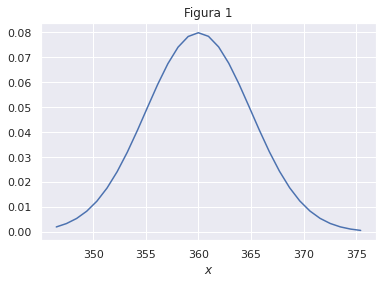

In [65]:
fig, ax = plt.subplots()
h, bins_x = np.histogram(X, bins=30)
pdf_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins_x - mu)**2 / (2 * sigma**2))
ax.plot(bins_x, pdf_x)
plt.xlabel("$x$")
plt.title("Figura 1")
plt.show()

- 2.1 Qual a probabilidade de que o volume seja menor que $355$ ml?

![Item 1](img_auxiliares/2_1.jpeg)

A probabilidade desejada é dada pela área cinza da imagem anterior. Sabe-se $P(\mu - \sigma < X < \mu + \sigma) = 0.6827$, assim:
\begin{align*}
    P(X < 355) &= \frac{1 - P(\mu - \sigma < X < \mu + \sigma)}{2}&\\
               &= 0.15865&\\
\end{align*}

- 2.2 Se os refrigerantes com menos de $350$ ml e mais de $370$ ml forem eliminados, qual a proporção de refrigerantes eliminados?

![Item 2](img_auxiliares/2_2.jpg)

Seja, $Y$ os refrigerantes com menos de $350$ ml e mais de $370$ ml. A proporção de $Y$ pode ser vista como  $1 - P(\mu - 2\sigma < X < \mu + 2\sigma)$ (área cinza da imagem anterior), pois $350$ e $370$ equivale à $\mu - 2\sigma$ e $\mu + 2\sigma$, respectivamente.

Sabe-se que $P (\mu - 2\sigma < X < \mu + 2\sigma) = 0.9545$, logo :
\begin{align}
    P(Y) &= \frac{1 - P(\mu - 2\sigma < X < \mu + 2\sigma)}{2}&\\
               &= 0.0455
\end{align}

**R:** A proporção dos refrigerantes eliminados é $0.0455$.

- 2.3 Determine as especificações de volume de modo que $99\%$ dos refrigerantes sejam aceitos

Para que $99\%$ sejam aceitos, $1\%$ precisa ser rejeitado. Como a distribuição é simétrica, significa que $0.5\%$ (ou $0.005$) das extremidades de cada lado da distribuição devem ser rejeitados. Pela tabela de distribuição cumulativa, $P(Z<=-3.29)=0.005$. Da mesma forma, $P(Z>=3.29)=0.005$.

Assim, para que $99\%$ dos refrigerantes sejam aceitos são $\mu - 3.29\sigma < x <\mu + 3.29\sigma$, ou:

\begin{align*}
    \mu - 3.29\sigma < x <\mu + 3.29\sigma &\\
    360 - 3.29\times 5 < x <360 + 3.29\times5 &\\
    360 - 16.45 < x <360 + 16.45 &\\
    343.55 < x <375.45 &\\
\end{align*}


**3 Seja uma variável aleatória X distribuição binomial com $p = 0.5$ e $n = 10$.**

- 3.1 Aproxime por uma variável aleatória $Y$ com distribuição normal, plotando os dois gráficos.

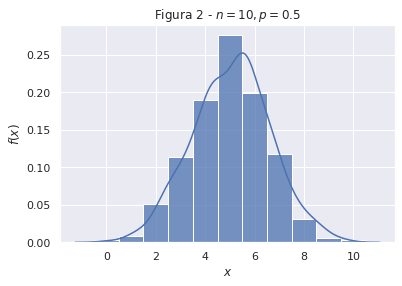

In [67]:
n = 10
p = 0.5
fig, ax = plt.subplots()
X = np.random.binomial(n=n, p=p, size=1000)
Z = np.random.normal(n*p, scale=np.sqrt(n*p*(1-p)), size=1000)
sns.histplot(data=X, stat='density', discrete=True, ax=ax)
sns.kdeplot(Z, ax=ax)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("Figura 2 - $n=10, p=0.5$");

- 3.2 Repita a aproximação para $n = 5,8,11,14,17,20$, e faça um gráfico de barras mostrando o erro médio quadrático para todos os valores de $X$ entre as duas aproximações para $P(X=x)$, com uma barra para cada valor de $n$.

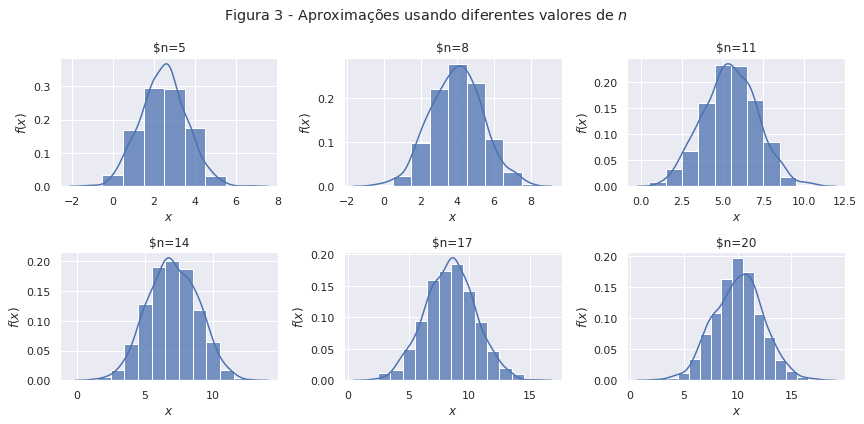

In [68]:
Ns = [5, 8, 11, 14, 17, 20]
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,6))
p=0.5
ix = 0
for i in range(2):
    for j in range(3):
        n = Ns[ix]
        X = np.random.binomial(n=n, p=p, size=1000)
        Z = np.random.normal(n*p, scale=np.sqrt(n*p*(1-p)), size=1000)
        sns.histplot(data=X, stat='density', discrete=True, ax=ax[i][j])
        sns.kdeplot(Z, ax=ax[i][j])
        ax[i][j].set_ylabel("$f(x)$")
        ax[i][j].set_xlabel("$x$")
        ax[i][j].set_title("$n={}".format(n))
        ix+=1
plt.suptitle("Figura 3 - Aproximações usando diferentes valores de $n$")
plt.tight_layout()

- 3.3 Repita para $n = 10$ e $p= 0.1$. Avalie e considere o uso de correção de continuidade (continuity correction) para conseguir uma boa aproximação.

**4. O tempo entre as ligações para uma empresa de suprimentos tem distribuição exponencial, com um tempo médio entre as ligações de 15 minutos**

- 4.1. Qual a probabilidade de que não haja chamadas em um intervalo de $30$ minutos?

Cada ligação ocorre à cada $15$ minutos, ou seja, em média, ocorre $4$ chamadas por hora ($\lambda = 4$). Em $30$ minutos ($0.5$ hora), a probabilidade de que não haja chamadas é de:

\begin{align*}
    P(X>x) &= \int_{x}^{\infty}\lambda e^{-\lambda x} dx &\\
    P(X>0.5)&= \int_{0.5}^{\infty}4e^{-4 (0.5)} dx &\\
           &= e^{-4 (0.5)} &\\
           &= 0.1353 &
\end{align*}

- 4.2. Qual a probabilidade de que ao menos uma chamada chegue em um intervalo de $10$ minutos?

$10$ minutos = $\frac{1}{6}h$, logo:

\begin{align*}
    1 - P(X>x) &= 1 - \int_{x}^{\infty}\lambda e^{-\lambda x} dx &\\
    1 - P(X>\frac{1}{6})   &= 1 - \int_{\frac{1}{6}}^{\infty}4e^{-4 \frac{1}{6}} dx &\\
           &= 1 - e^{-4 \frac{1}{6}} &\\
           &= 0.4165 &
\end{align*}

- 4.3. Qual a probabilidade de que a primeira chamada chegue entre $5$ e $10$ min após abertura do serviço?

\begin{align*}
P(\frac{1}{12}< X < \frac{1}{6}) &= F(\frac{1}{6}) - F(\frac{1}{12}) &\\
                                &= \int_{\frac{1}{6}}^{\infty}4e^{-4 \frac{1}{6}} dx - \int_{\frac{1}{12}}^{\infty}4e^{-4 \frac{1}{12}} dx &\\
                                &= e^{-\frac{2}{3}} - e^{-\frac{1}{3}} &\\
                                &= 0.48658 - 0.28346 &\\
                                &= 0.20312 &\\

\end{align*}

- 4.4. Determine tempo para que se tenha probabilidade de $0.9$ para que ao menos uma chamada chegue.

A probabilide de que ao menos uma chamada chegue seja $0.9$ é igual à probabilidade de que nenhuma chamada ocorra seja de $0.1$, ou $P(X>x) = 0.1$, ou seja:

\begin{align*}
    P(X>x) &= \int_{x}^{\infty}\lambda e^{-\lambda x} dx = 0.1 &\\
        \int_{x}^{\infty}4 e^{-4 x} dx   &= 0.1 &\\
        e^{-4 x} &= 0.1 &\\
\end{align*}

Aplicando o log natural nos dois lados

\begin{align*}
    -4 x &= ln(0.1) &\\
    -4 x &= -2.3026 &\\
    x &= \frac{2.3026}{4} &\\
    x &= 0.57565 &\\
\end{align*}

Convertendo para minutos, $0.5756 \times 60 = 34.54$ minutos

5. Gere uma variável aleatória $X$ com distribuição normal padronizada contendo $1000$ amostras

In [74]:
mu=0.0
sigma=1.0
X = np.random.normal(mu, sigma, 1000)

- 5.1. Faça um histograma de $X$ e sobre ele plote a pdf $N(0,1)$

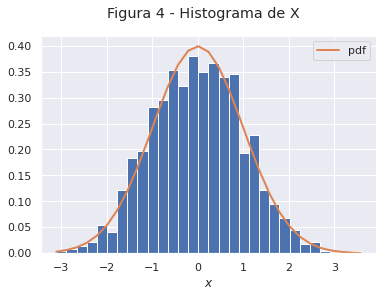

In [75]:
fig, ax = plt.subplots()
count_x, bins_x, _ = ax.hist(X, bins=30, density=True)
pdf_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins_x - mu)**2 / (2 * sigma**2))
ax.plot(bins_x, pdf_x, linewidth=2, label='pdf')
plt.legend()
plt.xlabel("$x$")
plt.suptitle("Figura 4 - Histograma de X");

- 5.2 Faça um histograma de e sobre ele plote a pdf $X_1^2$

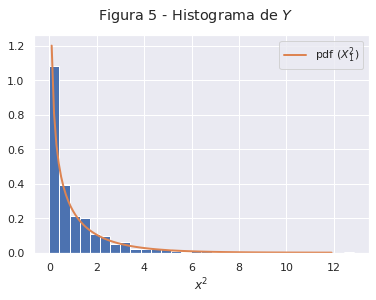

In [76]:
# eleva elemtos de X ao quadrado
Y = X**2
fig, ax = plt.subplots()
# histograma de Y
county, binsy, _ = ax.hist(Y, bins=30, density=True)
x = np.arange(0, 12, 0.1)
# pdf da função qui-quadrado com 1 grau de liberdade
pdf_y = stats.chi2.pdf(x, df=1)
ax.plot(x, pdf_y, linewidth=2, label='pdf ($X_1^2$)')
plt.legend()
plt.xlabel("$x^2$")
plt.suptitle("Figura 5 - Histograma de $Y$");

- 5.3 Obtenha $P(-2\le X \le2)$ e $y$ tal que $P(Y\le y) = P(-2\le X \le2)$

A probabilidade desejada pode ser calculada a partir da diferença entre a cdf de $x=2$ e $x=-2$. Dado que a distribuição é normal, por simplicidade podemos calcular com a função  ``norm``, da biblioteca ``scipy.stats`` do Python:

In [78]:
p2 = stats.norm(loc=0, scale=1).cdf(2) - stats.norm(loc=0, scale=1).cdf(-2)
p2

0.9544997361036416

Para obter $P(Y\le y) = P(-2\le X \le2)$, basta calcular a cdf de $Y$ e verificar o valor de $y$ com a cdf correspondente ao resultado anterior. Isso pode ser feito simplesmente verificando os valores em uma tabela (usando a biblioteca pandas do Python).

In [79]:
sortY = np.sort(Y)
cdfy = 1. * np.arange(len(sortY)) / (len(sortY) - 1)
dictY = {'y':sortY, 'cdf':cdfy}
dfDistY = pd.DataFrame(dictY)
dfDistY[(dfDistY['cdf']>p2-0.001) & (dfDistY['cdf']<p2+0.001)]

,y,cdf
953,3.915120,0.953954
954,3.950291,0.954955


O valor correspondente está no índice $954$.

In [80]:
dfDistY[(dfDistY['cdf']>p2-0.001) & (dfDistY['cdf']<p2+0.001)].loc[954].y

3.9502907253565827

O valor de $y$ é aproximadmente $3.95$

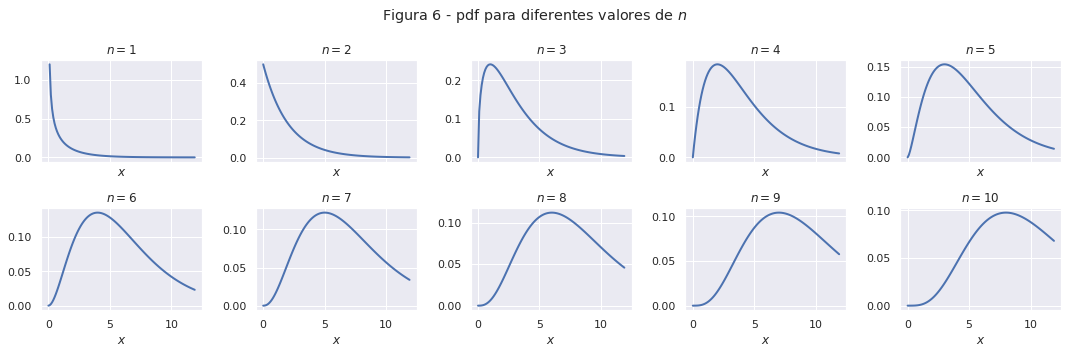

In [77]:
# elava elemtos de X ao quadrado
Y = X**2
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5), sharex=True)
# histograma de Y
x = np.arange(0, 12, 0.1)
# pdf da função qui-quadrado com 1 grau de liberdade
n = 1
for i in range(2):
    for j in range(5):
        pdf_y = stats.chi2.pdf(x, df=n)
        ax[i][j].plot(x, pdf_y, linewidth=2)
        ax[i][j].set_xlabel("$x$")
        ax[i][j].set_title("$n=${}".format(n))
        n+=1
plt.suptitle("Figura 6 - pdf para diferentes valores de $n$")
plt.tight_layout()
plt.show()

A Figuara 6 mostra que o pdf da distribuição qui-quadrado tende a apresentar uma distribuição levemente paracida com uma distribuição normal à medida que o número de graus de liberdade aumenta. Mais especificamente, a pdf da distribuição tende à ficar centrada na média dos valores que a distribuição pode assumir.